<b><h3>LSTM

In [ ]:
from keras.datasets import imdb
(X_data,y_data),(tt_x,tt_y)=imdb.load_data(num_words=500)
from sklearn.model_selection import train_test_split
t_x,v_x,t_y,v_y=train_test_split(X_data,y_data,test_size=0.2,random_state=42)
from keras.preprocessing.sequence import pad_sequences 
ck_t_x=pad_sequences(t_x,maxlen=100)
ck_v_x=pad_sequences(v_x,maxlen=100)

In [ ]:
from keras import Sequential
from keras.layers import SimpleRNN,Dense, Embedding,LSTM #이진분류 할거임 #SimpleRNN : 기본 RNN
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
m=Sequential()
m.add(Embedding(500,16,input_length=100))
m.add(LSTM(8)) 
m.add(Dense(1,activation='sigmoid'))
m.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 8)                 800       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
m.compile(loss='binary_crossentropy',metrics=['accuracy']) 
es=EarlyStopping(patience=3,restore_best_weights=True) 
ck=ModelCheckpoint("m.h5")
hy=m.fit(ck_t_x,t_y,validation_data=(ck_v_x,v_y),callbacks=[es,ck],batch_size=64,epochs=100)

Epoch 1/100
313/313 [==============================] - 12s 31ms/step - loss: 0.5848 - accuracy: 0.7119 - val_loss: 0.4984 - val_accuracy: 0.7724
Epoch 2/100
313/313 [==============================] - 9s 30ms/step - loss: 0.4631 - accuracy: 0.7851 - val_loss: 0.4480 - val_accuracy: 0.7992
Epoch 3/100
313/313 [==============================] - 10s 31ms/step - loss: 0.4405 - accuracy: 0.7979 - val_loss: 0.4447 - val_accuracy: 0.7924
Epoch 4/100
313/313 [==============================] - 9s 30ms/step - loss: 0.4335 - accuracy: 0.8001 - val_loss: 0.4423 - val_accuracy: 0.7898
Epoch 5/100
313/313 [==============================] - 10s 31ms/step - loss: 0.4286 - accuracy: 0.8013 - val_loss: 0.4693 - val_accuracy: 0.7834
Epoch 6/100
313/313 [==============================] - 9s 30ms/step - loss: 0.4232 - accuracy: 0.8047 - val_loss: 0.4311 - val_accuracy: 0.8018
Epoch 7/100
313/313 [==============================] - 10s 31ms/step - loss: 0.4185 - accuracy: 0.8081 - val_loss: 0.4361 - val_accur

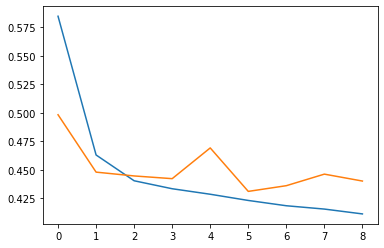

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])

<b><h3>Dropout 적용

In [ ]:
m1=Sequential()
m1.add(Embedding(500,16,input_length=100))
m1.add(LSTM(8,dropout=0.3))
m1.add(Dense(1,activation='sigmoid')) #여전히 층은 단층
m1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_3 (LSTM)               (None, 8)                 800       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
m1.compile(loss='binary_crossentropy',metrics=['accuracy']) 
es=EarlyStopping(patience=3,restore_best_weights=True) 
ck=ModelCheckpoint("m.h5")
hy=m1.fit(ck_t_x,t_y,validation_data=(ck_v_x,v_y),callbacks=[es,ck],batch_size=64,epochs=100) 

Epoch 1/100
313/313 [==============================] - 12s 33ms/step - loss: 0.5954 - accuracy: 0.6777 - val_loss: 0.5937 - val_accuracy: 0.6748
Epoch 2/100
313/313 [==============================] - 10s 31ms/step - loss: 0.4783 - accuracy: 0.7789 - val_loss: 0.4627 - val_accuracy: 0.7886
Epoch 3/100
313/313 [==============================] - 10s 30ms/step - loss: 0.4529 - accuracy: 0.7909 - val_loss: 0.4470 - val_accuracy: 0.7858
Epoch 4/100
313/313 [==============================] - 10s 31ms/step - loss: 0.4385 - accuracy: 0.7983 - val_loss: 0.4329 - val_accuracy: 0.8042
Epoch 5/100
313/313 [==============================] - 10s 31ms/step - loss: 0.4322 - accuracy: 0.7994 - val_loss: 0.5233 - val_accuracy: 0.7544
Epoch 6/100
313/313 [==============================] - 10s 33ms/step - loss: 0.4241 - accuracy: 0.8028 - val_loss: 0.4640 - val_accuracy: 0.7804
Epoch 7/100
313/313 [==============================] - 10s 32ms/step - loss: 0.4190 - accuracy: 0.8081 - val_loss: 0.4439 - val_ac

In [ ]:
m2=Sequential()
m2.add(Embedding(500,16,input_length=100))
m2.add(LSTM(8,dropout=0.3,return_sequences=True)) #LSTM은 Sequential에게 값을 받아야한다 #return_sequence 시퀀스로 가져온다
m2.add(LSTM(8,dropout=0.3))
m2.add(Dense(1,activation='sigmoid')) #여전히 층은 단층
m2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_4 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_5 (LSTM)               (None, 8)                 544       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
m2.compile(loss='binary_crossentropy',metrics=['accuracy']) 
es=EarlyStopping(patience=3,restore_best_weights=True) 
ck=ModelCheckpoint("m.h5")
hy=m2.fit(ck_t_x,t_y,validation_data=(ck_v_x,v_y),callbacks=[es,ck],batch_size=64,epochs=100) 

Epoch 1/100
313/313 [==============================] - 26s 71ms/step - loss: 0.5748 - accuracy: 0.6969 - val_loss: 0.5135 - val_accuracy: 0.7492
Epoch 2/100
313/313 [==============================] - 21s 68ms/step - loss: 0.4757 - accuracy: 0.7810 - val_loss: 0.4893 - val_accuracy: 0.7624
Epoch 3/100
313/313 [==============================] - 19s 60ms/step - loss: 0.4573 - accuracy: 0.7864 - val_loss: 0.4521 - val_accuracy: 0.7908
Epoch 4/100
313/313 [==============================] - 19s 59ms/step - loss: 0.4427 - accuracy: 0.7946 - val_loss: 0.4506 - val_accuracy: 0.7900
Epoch 5/100
313/313 [==============================] - 21s 68ms/step - loss: 0.4341 - accuracy: 0.7978 - val_loss: 0.4350 - val_accuracy: 0.7936
Epoch 6/100
313/313 [==============================] - 19s 60ms/step - loss: 0.4269 - accuracy: 0.8037 - val_loss: 0.4890 - val_accuracy: 0.7628
Epoch 7/100
313/313 [==============================] - 18s 59ms/step - loss: 0.4224 - accuracy: 0.8034 - val_loss: 0.4342 - val_ac

<b><h3>GRU

In [ ]:
from keras.layers import GRU
m3=Sequential()
m3.add(Embedding(500,16,input_length=100))
m3.add(LSTM(8,dropout=0.3,return_sequences=True)) #LSTM은 Sequential에게 값을 받아야한다
m3.add(LSTM(8,dropout=0.3))
m3.add(Dense(1,activation='sigmoid')) #여전히 층은 단층
m3.summary()